In [166]:
import soundfile # to read audio file
import numpy as np
import pandas as pd
import librosa # to extract speech features
import glob
import os
import pickle 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model, to_categorical



In [167]:
folder_with_predictions = "prediction-data"

In [168]:
import matplotlib.pyplot as plt
def get_metadata_from_filename(filename):
    split = filename.split("_")
    
    video_name = split[0]
    views = split[1]
    likes = split[2]
    dislikes = split[3]
    creator = split[4]
    creator = creator.split(".")[0]
    
    return {
        "views": views,
        "likes": likes,
        "dislikes": dislikes,
        "creator": creator,
        "video_name": video_name
    }

In [169]:
predictions_folder = os.getcwd() + f"\\{folder_with_predictions}"
meta_data_dict = {}
df_collection = pd.DataFrame()
for root, subdirectories, files in os.walk(predictions_folder):
    
    for file in files:
        metadata = get_metadata_from_filename(file)
        
        vid_name = metadata["video_name"]
        creator = metadata["creator"]
        views = int(metadata["views"])
        likes = int(metadata["likes"])
        dislikes = int(metadata["dislikes"])
        
        engagement = likes+dislikes / views
        approval = likes / views
        disapproval = dislikes / views
        positive_ratio = likes / dislikes
        analysis_stats = {"engagement":engagement, "approval": approval, "disapproval": disapproval, "positive_ratio":positive_ratio}
        
        df_emotions = pd.read_csv(f"{predictions_folder}\\{file}")
        
        emotion_counts_dict['video_name'] = vid_name
        counts_dict = df_emotions['emotion'].value_counts(ascending=True).to_dict()
        # How large amount of emotions is dictated by the most common one
        monotonicity = max(counts_dict.values())/df_emotions.shape[0]
        
        emotion_counts_dict.update(counts_dict)
        emotion_counts_dict.update(analysis_stats)
        emotion_counts_dict['views'] = views
        emotion_counts_dict['likes'] = likes
        emotion_counts_dict['dislikes'] = dislikes
        emotion_counts_dict['monotonicity'] = monotonicity
        
        df_collection = df_collection.append(emotion_counts_dict, ignore_index=True)

df_collection = df_collection.set_index('video_name')

In [170]:
# Pick N videos with the most and least engagement
N = 15
df_top_engagement = df_collection.sort_values('engagement').head(N)
df_least_engagement = df_collection.sort_values('engagement').tail(N)

# And check the means
print(df_top_engagement['happy'].mean())
print(df_top_engagement['sad'].mean())
print(df_top_engagement['fearful'].mean())
print(df_top_engagement['angry'].mean())
print("----")
print(df_least_engagement['happy'].mean())
print(df_least_engagement['sad'].mean())
print(df_least_engagement['fearful'].mean())
print(df_least_engagement['angry'].mean())

406.93333333333334
12.066666666666666
226.73333333333332
1.9333333333333333
----
153.26666666666668
2.6666666666666665
260.26666666666665
1.8666666666666667


<AxesSubplot:xlabel='fearful', ylabel='likes'>

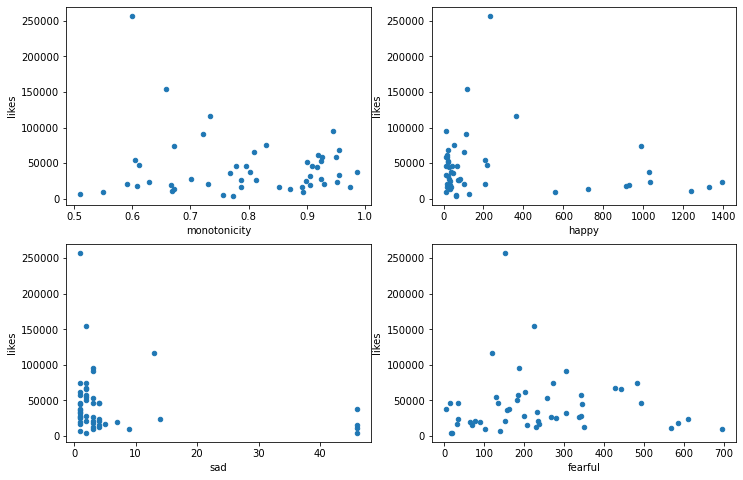

In [171]:
fig, axes = plt.subplots(figsize = (12,8), nrows=2, ncols=2)

metric = "likes"
df_collection.plot.scatter(x="monotonicity", y=metric,ax=axes[0,0])
df_collection.plot.scatter(x="happy", y=metric,ax=axes[0,1])
df_collection.plot.scatter(x="sad", y=metric,ax=axes[1,0])
df_collection.plot.scatter(x="fearful", y=metric,ax=axes[1,1])


<AxesSubplot:xlabel='fearful', ylabel='positive_ratio'>

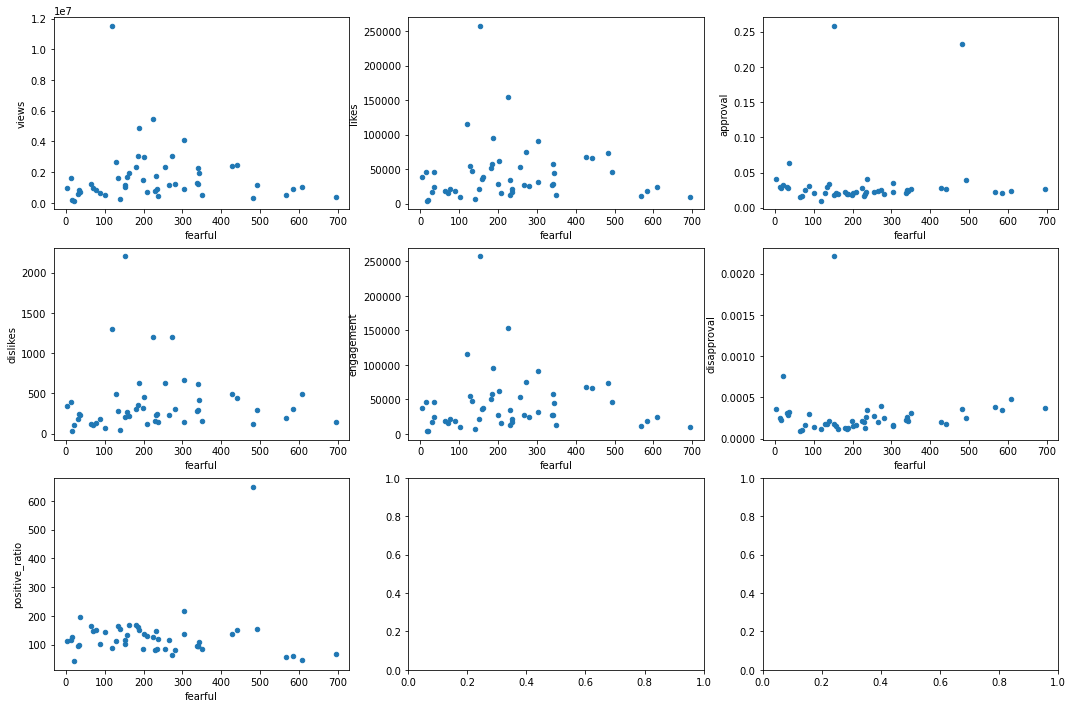

In [177]:
# Closer look on monotonicity
stat = "fearful"
fig, axes = plt.subplots(figsize = (18,12), nrows=3, ncols=3)
df_collection.plot.scatter(x=stat, y="views",ax=axes[0,0])
df_collection.plot.scatter(x=stat, y="likes",ax=axes[0,1])
df_collection.plot.scatter(x=stat, y="dislikes",ax=axes[1,0])
df_collection.plot.scatter(x=stat, y="engagement",ax=axes[1,1])
df_collection.plot.scatter(x=stat, y="approval",ax=axes[0,2])
df_collection.plot.scatter(x=stat, y="disapproval",ax=axes[1,2])
df_collection.plot.scatter(x=stat, y="positive_ratio",ax=axes[2,0])


In [173]:
df_collection.sort_values('dislikes',ascending=False).head(1)

,neutral,happy,fearful,views,likes,dislikes,sad,angry,engagement,approval,disapproval,positive_ratio,monotonicity
video_name,,,,,,,,,,,,,
But what is a neural network Chapter 1 Deep learning,6.0,231.0,153.0,996545.0,257000.0,2200.0,1.0,1.0,257000.002208,0.257891,0.002208,116.818182,0.6
